In [40]:
import numpy as np
from scipy.stats import gamma
import scipy.integrate
import pandas
# TO DO: Update to most recent Planck results
from astropy.cosmology import Planck18_arXiv_v2 as cosmo
from tqdm import tqdm
import matplotlib.pyplot as plt

tot_sky = 41253.
file='extrapolate'
area_dict={'JADES Deep':46./3600/tot_sky, 
           'JADES Medium':190./3600/tot_sky, 
           'JADES Deep Extended':190./3600/tot_sky, 
           'JADES Medium Extended':5*190./3600/tot_sky,
           '1 pointing':  2*4.84/3600/tot_sky, 
           '20 pointings':  20*2*4.84/3600/tot_sky, 
           '100 pointings':  2*4.84/3600*100/tot_sky, 
           '1000 pointings':  2*4.84/3600*1000/tot_sky}

data = np.loadtxt("../erb2010_continuum.dat")
x = data[:,0]
y = data[:,1] * x**2 / 3.e18 # Convert to correct flux values

# Constants # Total degrees on the sky
masses = np.array([8.0, 8.5, 9.0, 9.5, 10.0, 10.5, 11.0]) # Mass bins in log(M/Msun)
masses = np.arange(8,12,0.25) # Mass bins in log(M/Msun)

trials = 10000 # Number of trials for calculating median from gamma function
mmin = 9 # Minimum halo mass for HMF
mmax = 13.5 # Maximum halo mass for HMF

# Function to find closest wavelength in measured galaxy spectrum compared to given value
def nearest_wavelength(x, val):
    i = (np.abs(x - val)).argmin()
    return x[i]

# Define a class for different survey designs
class survey:
    def __init__(self, ABmax, area, cv_file, wavelength = 0, num_pointings = 1):
        self.ABmax = ABmax # Limiting AB magnitude of the survey
        self.area = area # Survey area
        self.file = cv_file # Name of cosmic variance table file
        self.point = num_pointings # Number of independent pointings
        self.wavelength = wavelength # Center wavelength for the chosen filter

# Method to take one trial of a gamma distribution with a given variance and mean
def trial(sig_v, mean, trials=10000):
    var = sig_v**2*mean**2
    k = mean**2/var
    t = var/mean
    rand = np.rint(np.random.gamma(k, scale=t, size=trials))
    return rand


0.4499686274969179 0.43209 0.45
0.06674184009200006


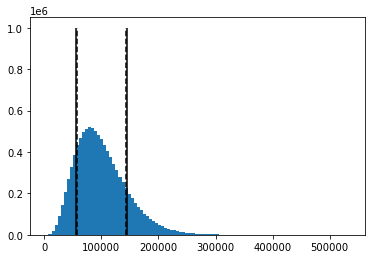

In [104]:
s, m=0.45,100000
t=trial(s,m, int(1e7))
print(np.std(t)/m, (np.quantile(t, (50+34)/100)-np.quantile(t, (50-34)/100))/m/2, s)
print((np.mean(t)-np.median(t))/m)
plt.hist(t, bins=100);
plt.vlines(m-np.std(t),0,1e6, 'k')
plt.vlines(m+np.std(t),0,1e6, 'k')
plt.vlines((np.quantile(t, (50+34)/100)),0,1e6, 'k', linestyle='dashed')
plt.vlines((np.quantile(t, (50-34)/100)),0,1e6, 'k',  linestyle='dashed')

In [98]:
(np.quantile(t, (50+34)/100))

109927.0